In [1]:
import numpy as np
import pandas as pd
from IO.loader import load_path, load_images, load_annotations_path, load_annotations, get_label_dic

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_root = "/home/tanida/workspace/Insect_Phenology_Detector/data"
img_folder = "refined_images"
train_anno_folders = ["annotations_0", "annotations_2", "annotations_3", "annotations_20200806"]

In [3]:
unused_labels = ["]", ]
print("loading path ...")
annos, imgs = load_path(data_root, img_folder, train_anno_folders)
print("loading images ...")
images = load_images(imgs)
annotations_path = load_annotations_path(annos, images)
print("loading annos ...")
anno = load_annotations(annotations_path)
label_dic = get_label_dic(anno, each_flag=True, make_refinedet_data=True)
print(label_dic)

loading path ...
loading images ...
loading annos ...
['Coleoptera' 'Diptera' 'Ephemeridae' 'Ephemeroptera' 'Hemiptera'
 'Hymenoptera' 'Lepidoptera' 'Megaloptera' 'Plecoptera' 'Trichoptera'
 'Unknown' 'medium insect' 'small insect' 'snail' 'spider' 'unknown']
[  40  450  130  262   31    7 1175    2  487  381  441  431 1325    1
    2  578]
{'Coleoptera': 0, 'Diptera': 1, 'Ephemeridae': 2, 'Ephemeroptera': 3, 'Hemiptera': 4, 'Hymenoptera': 5, 'Lepidoptera': 6, 'Megaloptera': 7, 'Plecoptera': 8, 'Trichoptera': 9, 'Unknown': 10, 'medium insect': 11, 'small insect': 12, 'snail': 13, 'spider': 14, 'unknown': 15}


In [4]:
label_name = [k for k, v in label_dic.items()]
data_dic = {}
for label in label_name:
    data_dic.update({label: []})

In [5]:
for k,v in anno.items():
    if k == ".ipynb_checkpoints":
        continue
    for value in anno[k]:
        if value[0] in unused_labels:
            continue
        image_size = images[k].shape[0:2]
        upper_left_x = value[1][0]/image_size[1]
        upper_left_y = value[1][1]/image_size[0]
        under_right_x = value[1][2]/image_size[1]
        under_right_y = value[1][3]/image_size[0]
        data_dic[value[0]].append([under_right_x - upper_left_x, under_right_y - upper_left_y])

In [6]:
def preprocess_scatterPlot(X_data, use_PCA=False):
    data_index = range(0, len(X_data))
    
    n_components = 2
    whiten = False
    random_state = 2018

    pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)
    
    if use_PCA is True:
        X_data = pca.fit_transform(X_data)
    X_data = pd.DataFrame(data=X_data, index=data_index)
    return X_data, data_index

def scatterPlot(X_data, data_index, y_data=None):
    tempDF = pd.DataFrame(data=X_data.loc[:, 0:1], index=X_data.index)
    if y_data is not None:
        tempDF = pd.concat((tempDF, y_data), axis=1, join="inner")
        tempDF.columns = ["First Vector", "Second Vector", "Label"]
        sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=tempDF, fit_reg=False)
    else:
        tempDF.columns = ["First Vector", "Second Vector"]
        sns.lmplot(x="First Vector", y="Second Vector", data=tempDF, fit_reg=False)
    axe = plt.gca()
    axe.set_title("Scatter Plot of Bounding Box")

In [7]:
def get_dbscan_result(X_data, eps=0.005, min_samples=5):
    leaf_size = 30
    n_jobs = 1

    db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, n_jobs=n_jobs)
    
    X_data_dbscanClustered = db.fit_predict(X_data.loc[:, :])
    X_data_dbscanClustered = pd.DataFrame(data=X_data_dbscanClustered, index=X_data.index, columns=['cluster'])
    
    countByCluster = pd.DataFrame(data=X_data_dbscanClustered['cluster'].value_counts())
    countByCluster.reset_index(inplace=True, drop=False)
    countByCluster.columns = ['cluster','clusterCount']
    return countByCluster, X_data_dbscanClustered

### Diptera

In [8]:
X_data = np.array(data_dic['Diptera'])
X_data.shape

(450, 2)

,cluster,clusterCount
0,0,447
1,-1,3


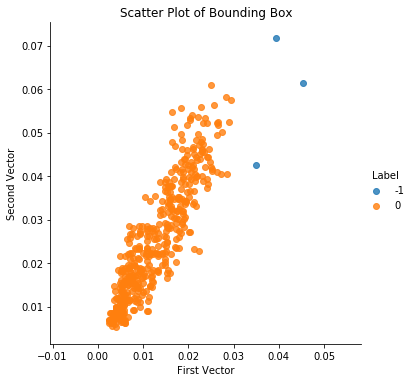

In [9]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Ephemeridae

In [10]:
X_data = np.array(data_dic['Ephemeridae'])
X_data.shape

(130, 2)

,cluster,clusterCount
0,0,114
1,-1,16


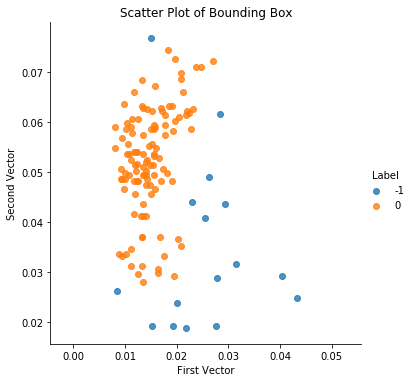

In [11]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Ephemeroptera

In [12]:
X_data = np.array(data_dic['Ephemeroptera'])
X_data.shape

(262, 2)

,cluster,clusterCount
0,0,253
1,-1,9


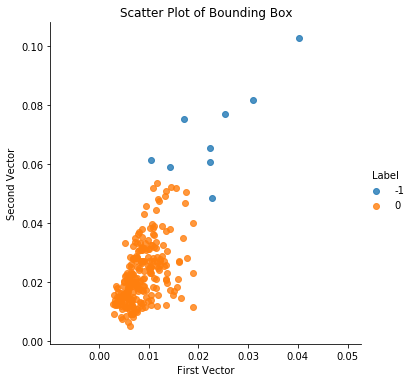

In [13]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Lepidoptera

In [14]:
X_data = np.array(data_dic['Lepidoptera'])
X_data.shape

(1175, 2)

,cluster,clusterCount
0,0,1164
1,-1,11


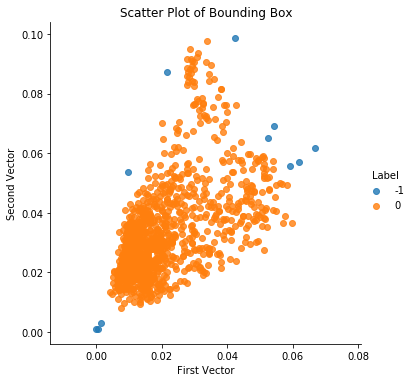

In [15]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Plecoptera

In [16]:
X_data = np.array(data_dic['Plecoptera'])
X_data.shape

(487, 2)

,cluster,clusterCount
0,0,464
1,-1,17
2,1,6


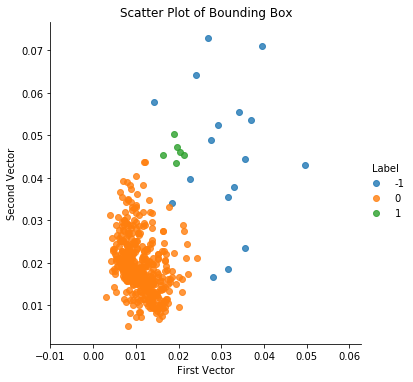

In [17]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Trichoptera

In [18]:
X_data = np.array(data_dic['Trichoptera'])
X_data.shape

(381, 2)

,cluster,clusterCount
0,0,374
1,-1,7


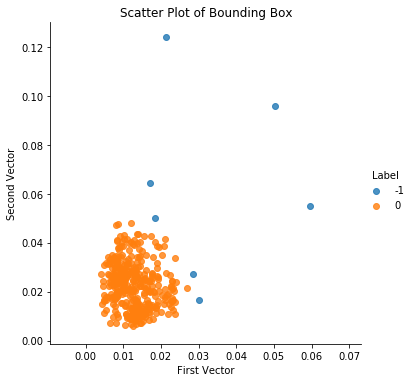

In [19]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### Unknown

In [20]:
X_data = np.array(data_dic['Unknown'])
X_data.shape

(441, 2)

,cluster,clusterCount
0,0,436
1,-1,5


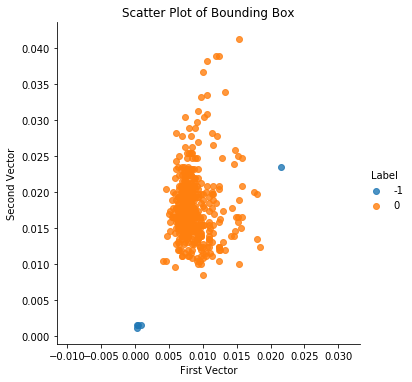

In [21]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### medium insect

In [22]:
X_data = np.array(data_dic['medium insect'])
X_data.shape

(431, 2)

,cluster,clusterCount
0,0,430
1,-1,1


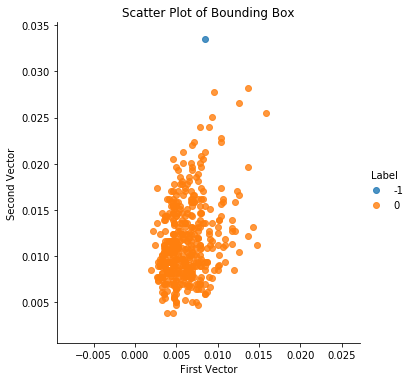

In [23]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster

### small insect

In [24]:
X_data = np.array(data_dic['small insect'])
X_data.shape

(1325, 2)

,cluster,clusterCount
0,0,1316
1,-1,9


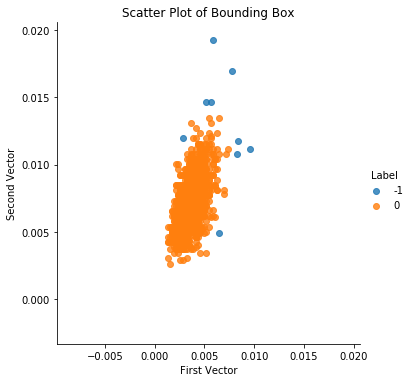

In [25]:
X_data, data_index = preprocess_scatterPlot(X_data)
countByCluster, X_data_dbscanClustered = get_dbscan_result(X_data, eps=0.001)
scatterPlot(X_data, data_index, y_data=X_data_dbscanClustered["cluster"])
countByCluster